In [2]:
import pandas as pd
from scipy import stats

df = pd.read_csv("~/Downloads/data/medical_data.csv")
df.head()

,death,amiodarone,loop_diuretics,ivabradine,ARB,digoxin,MRA,heart_failure,AOS,SBP,DBP,PLT,LDL,HDL,LVEF,Na+,K+,MPV
0,0,0,0,1,1,1,0,2,0,62.0,126.0,196.0,50.0,42.0,28.0,136.0,4.30,9.9
1,0,1,1,0,1,0,1,0,1,72.0,108.0,245.0,59.0,85.0,25.0,147.0,4.58,13.3
2,0,0,0,0,0,1,1,2,2,73.0,109.0,219.0,79.0,61.0,14.0,133.0,4.05,1.5
3,0,0,0,1,1,1,0,2,1,55.0,114.0,294.0,97.0,55.0,8.0,150.0,5.34,7.8
4,0,0,1,0,1,1,1,2,2,70.0,95.0,293.0,96.0,30.0,28.0,151.0,5.25,6.8


death


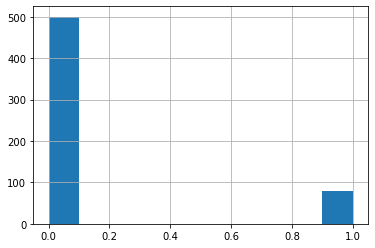

amiodarone


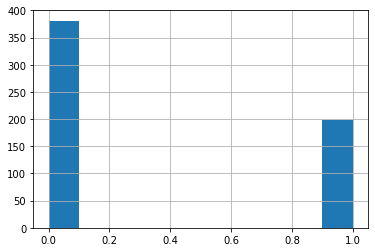

loop_diuretics


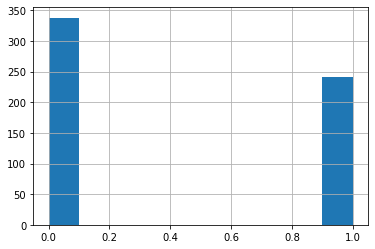

ivabradine


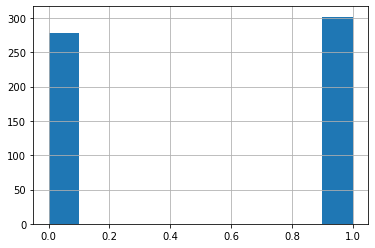

ARB


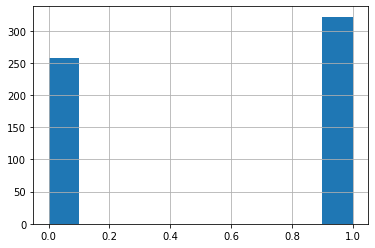

digoxin


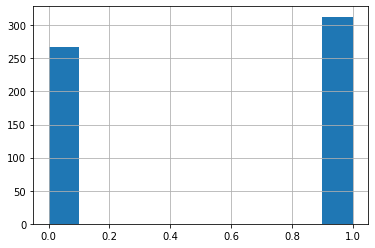

MRA


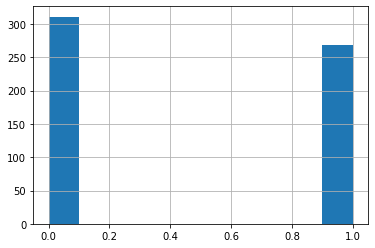

heart_failure


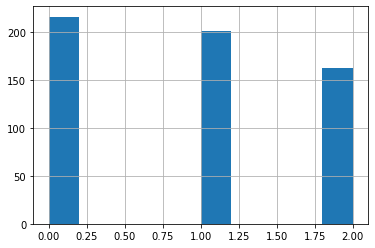

AOS


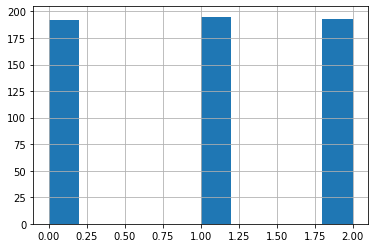

SBP


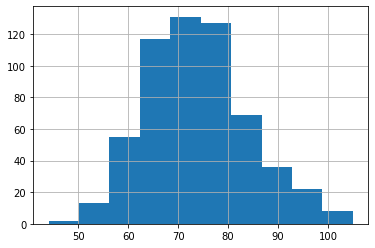

DBP


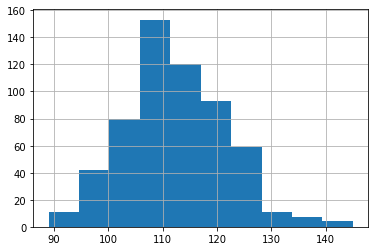

PLT


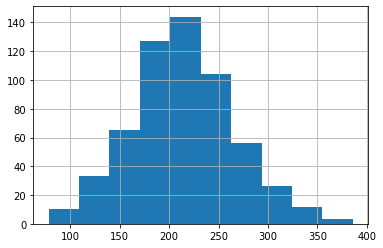

LDL


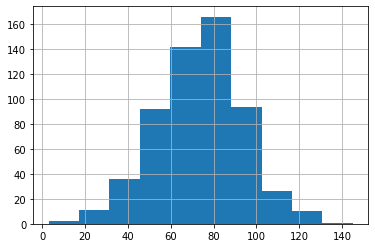

HDL


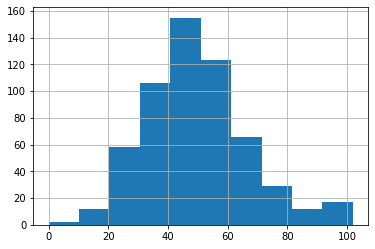

LVEF


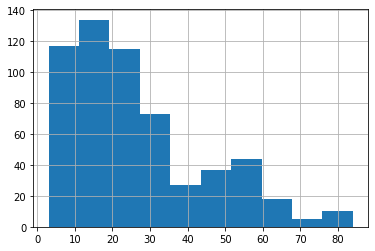

Na+


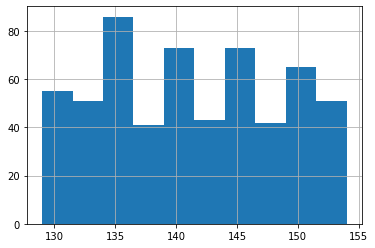

K+


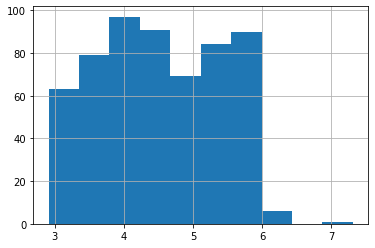

MPV


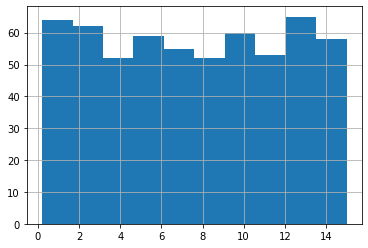

In [5]:
import matplotlib.pyplot as plt
for col in df.columns:
    print(col)
    fig, ax = plt.subplots()
    df[col].hist()
    plt.show()

In [14]:
from scipy.stats import shapiro

def shapiro_wilk_test(data):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
#     else:
#         print('Sample does not look Gaussian (reject H0)')
        
for col in df.columns:
    print(col)
    shapiro_wilk_test(df.loc[df["death"]==0,col])

death
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)
amiodarone
Statistics=0.562, p=0.000
loop_diuretics
Statistics=0.596, p=0.000
ivabradine
Statistics=0.634, p=0.000
ARB
Statistics=0.630, p=0.000
digoxin
Statistics=0.633, p=0.000
MRA
Statistics=0.633, p=0.000
heart_failure
Statistics=0.778, p=0.000
AOS
Statistics=0.794, p=0.000
SBP
Statistics=0.996, p=0.258
Sample looks Gaussian (fail to reject H0)
DBP
Statistics=0.997, p=0.527
Sample looks Gaussian (fail to reject H0)
PLT
Statistics=0.996, p=0.236
Sample looks Gaussian (fail to reject H0)
LDL
Statistics=0.998, p=0.937
Sample looks Gaussian (fail to reject H0)
HDL
Statistics=0.997, p=0.439
Sample looks Gaussian (fail to reject H0)
LVEF
Statistics=0.908, p=0.000
Na+
Statistics=0.954, p=0.000
K+
Statistics=0.949, p=0.000
MPV
Statistics=0.949, p=0.000


In [13]:
df._get_numeric_data().columns

Index(['death', 'amiodarone', 'loop_diuretics', 'ivabradine', 'ARB', 'digoxin',
       'MRA', 'heart_failure', 'AOS', 'SBP', 'DBP', 'PLT', 'LDL', 'HDL',
       'LVEF', 'Na+', 'K+', 'MPV'],
      dtype='object')

In [15]:
for col in df.columns:
    print(df[col].nunique())

2
2
2
2
2
2
2
3
3
55
53
198
102
79
70
26
261
145


In [16]:
def perform_tests(data):
    print("columns=", data.columns)
    categorical_cols = ["amiodarone", "loop_diuretics", "ivabradine", "ARB", "digoxin", "MRA", "heart_failure", "AOS"]
    numerical_cols = ["SBP", "DBP", "PLT", "LDL", "HDL", "LVEF", "Na+", "K+", "MPV"]

    # Run chi square test for categorical columns
    chi_square_results = []
    for col in categorical_cols:
        p_value = run_chi_square_test(data, col)
        chi_square_results.append( (col, p_value) )

    # Run shapiro wilk test for all numerical columns
    shapiro_wilk_results = []
    for col in numerical_cols:
        p_death0, p_death1 = run_shapiro_wilk_test(data, col)
        shapiro_wilk_results.append( (col, (p_death0, p_death1)) )

    # Run ttest for numerical columns with normal distribution
    ttest_results = []
    for col in ["SBP", "DBP", "PLT", "LDL", "HDL"]:
        p_value = run_ttest(data, col)
        ttest_results.append( (col, p_value) )

    # Run man_whitney test for numerical columns don't have a normal distribution
    mann_whitney_results = []
    for col in ["LVEF", "Na+", "K+", "MPV"]:
        p_value = run_mann_whitney_test(data, col)
        mann_whitney_results.append( (col, p_value) )

    return {
        'mann_whitney': mann_whitney_results,
        'ttest': ttest_results,
        'chi_square': chi_square_results,
        'shapiro_wilk': shapiro_wilk_results
    }


def run_shapiro_wilk_test(df, col):
    data_death0 = df.loc[df["death"]==0, col]
    data_death1 = df.loc[df["death"]==1, col]

    stat_death0, p_death0 = stats.shapiro(data_death0)
    stat_death1, p_death1 = stats.shapiro(data_death1)
    
    return p_death0, p_death1

def run_chi_square_test(df, col):
    # create contingency table
    table = pd.crosstab(df[col], df["death"], margins=True)
    stat, p_value, dof, expected = stats.chi2_contingency(table)
    return p_value

def run_ttest(df, col):
    statistic, p_value = stats.ttest_ind(df[col], df["death"])
    return p_value

def run_mann_whitney_test(df, col):
    statistic, p_value =  stats.mannwhitneyu(df[col], df["death"])
    return p_value

In [17]:
perform_tests(df)

columns= Index(['death', 'amiodarone', 'loop_diuretics', 'ivabradine', 'ARB', 'digoxin',
       'MRA', 'heart_failure', 'AOS', 'SBP', 'DBP', 'PLT', 'LDL', 'HDL',
       'LVEF', 'Na+', 'K+', 'MPV'],
      dtype='object')


{'mann_whitney': [('LVEF', 1.3711836242878373e-207),
  ('Na+', 1.270583358342071e-207),
  ('K+', 1.4250504758908439e-207),
  ('MPV', 1.0575834096772507e-200)],
 'ttest': [('SBP', 0.0),
  ('DBP', 0.0),
  ('PLT', 0.0),
  ('LDL', 0.0),
  ('HDL', 0.0)],
 'chi_square': [('amiodarone', 4.0869624530012533e-13),
  ('loop_diuretics', 2.1568970837729472e-20),
  ('ivabradine', 0.15882958731858055),
  ('ARB', 0.7869205255553904),
  ('digoxin', 0.9644514007062124),
  ('MRA', 0.844551028390928),
  ('heart_failure', 2.6958551072347337e-09),
  ('AOS', 0.99999701802442)],
 'shapiro_wilk': [('SBP', (0.25810301303863525, 0.588147759437561)),
  ('DBP', (0.5271841287612915, 0.3715434670448303)),
  ('PLT', (0.23609748482704163, 0.6934987306594849)),
  ('LDL', (0.9366661906242371, 0.9500206112861633)),
  ('HDL', (0.4387868642807007, 0.0006414349772967398)),
  ('LVEF', (7.764072739377878e-17, 2.6782176973938476e-06)),
  ('Na+', (2.4576712193136174e-11, 0.007113812491297722)),
  ('K+', (4.414562031901381e-12, 

In [ ]:
SELECT group_id, player_id, max(total_score)
FROM (
    SELECT group_id, player_id, sum(score) AS total_score
    FROM (
        SELECT m.first_player AS player_id, m.first_score AS score, p.group_id
        FROM matches AS m
        LEFT JOIN players AS p
        ON m.first_player = p.player_id
        UNION ALL
        SELECT m.second_player AS player_id, m.second_score AS score, p.group_id
        FROM matches AS m
        LEFT JOIN players AS p
        ON m.second_player = p.player_id
    ) AS total_scores
    GROUP BY 1, 2
    ORDER BY 1, 3 DESC
) AS winner
GROUP BY 1


-- write your code in PostgreSQL 9.4
WITH total_scores AS (
    SELECT group_id, player_id, sum(score) AS total_score
    FROM (
        SELECT m.first_player AS player_id, m.first_score AS score, p1.group_id
        FROM matches AS m
        LEFT JOIN players AS p1
        ON m.first_player = p1.player_id
        UNION ALL
        SELECT m.second_player AS player_id, m.second_score AS score, p2.group_id
        FROM matches AS m
        LEFT JOIN players AS p2
        ON m.second_player = p2.player_id
    ) as merge
    GROUP BY 1, 2
    ORDER BY 1, 3 DESC
),
top_score AS (
    SELECT group_id, max(total_score) AS total_score
    FROM total_scores
    GROUP BY 1
),
winners AS (
    SELECT t.group_id, MIN(s.player_id) AS player_id
    FROM top_score AS t
    LEFT JOIN total_scores AS s 
    ON t.group_id = s.group_id AND t.total_score = s.total_score
    GROUP BY 1
    ORDER BY 1
)
SELECT p3.group_id,
CASE
    WHEN w.player_id IS NULL THEN p3.player_id
    ELSE w.player_id
END AS player_id
FROM players AS p3
LEFT JOIN winners AS w
ON p3.group_id = w.group_id
GROUP BY 1, 2
ORDER BY 1, 2
